In [1]:
segments_folder = '../matting_human_half/segments/'

In [41]:
import os
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt
import sys
sys.path.append('../')

## 测试生成trimap

In [3]:
import pickle
with open('../imgList.pkl', 'rb') as f:
    img_list = pickle.load(f)
with open('../imgMatte.pkl', 'rb') as f:
    alpha_list = pickle.load(f)

In [52]:
trimap_folder = '../matting_human_half/segments/trimap'
image_folder = '../matting_human_half/segments/image'
alpha_folder = '../matting_human_half/segments/alpha'

In [11]:
img = plt.imread('../'+img_list[0])

In [12]:
prefix_name = img_list[0].split('/')[-1].split('.')[0]
for alpha_file in alpha_list:
    if prefix_name in alpha_file:
        alpha = plt.imread('../'+alpha_file)
        break

In [13]:
alpha.shape

(800, 600, 4)

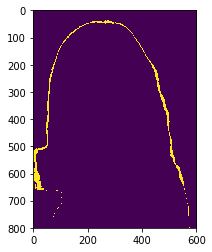

In [33]:
plt.imshow(((alpha[:, :, -1] < 0.8) & (alpha[:, :, -1] > 0.1)).astype(np.int32) * 255)

In [44]:
def gen_trimap(alpha, fg_thr=0.8, bg_thr=0.1, kernel_max=15, kernel_min=5):
    if len(alpha.shape) == 3 and alpha.shape[-1] == 4:
        alpha = alpha[:, :, -1].copy()
    trimap = np.zeros(alpha.shape)
    unsure_msk = np.zeros(alpha.shape)
    trimap[alpha >= fg_thr] = 255
    trimap[alpha <= bg_thr] = 0
    
    unsure_msk[(alpha>bg_thr) & (alpha<fg_thr)] = 1
    kernel_size = random.randint(kernel_min, kernel_max)
    print(kernel_size)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size, kernel_size))
    unsure_msk = cv2.dilate(unsure_msk, kernel, iterations=1).astype(bool)
    
    trimap[unsure_msk] = 128
    return trimap

In [51]:
test = plt.imread('test.png')
test.shape

(800, 600)

In [65]:
for alpha_file in alpha_list:
    filename = alpha_file.split('/')[-1]
    if not os.path.isfile('../'+alpha_file):
        print(alpha_file, 'missing')
        continue
    alpha = cv2.imread('../'+alpha_file, -1)
    cv2.imwrite(image_folder+'/'+filename, alpha[:, :, :3])
    cv2.imwrite(alpha_folder+'/'+filename, alpha[:, :, -1])
    cv2.imwrite(trimap_folder+'/'+filename, gen_trimap(alpha))

matting_human_half/matting/1803241125/matting_00000000/._1803241125-00000005.png missing
5
5
5
7
10
7
10
15
6
6
7
13
10
14
10
6
10
15
10
6
14
9
7
10
14
10
12
11
9
10
5
11
8
11
14
11
15
7
14
15
6
9
6
6
13
12
10
14
5
6
12
7
10
8
10
7
8
5
9
7
5
13
14
10
10
8
7
11
13
15
8
12
7
9
5
14
6
5
6
15
13
6
10
8
13
5
13
11
11
15
15
9
13
7
11
15
7
8
11
7
10
5
8
8
10
11
14
15
12
11
12
11
15
5
8
12
5
9
14
11
9
13
15
5
13
12
8
10
5
5
9
9
12
8
11
15
10
12
13
11
8
10
7
9
9
9
11
12
5
9
14
7
9
11
10
11
11
7
6
11
9
7
14
5
6
8
10
8
8
9
14
15
5
6
12
8
8
8
9
12
6
6
15
8
7
14
15
5
6
6
6
11
11
5
14
6
13
12
12
6
12
14
8
9
11
7
15
13
12
14
11
8
10
6
5
11
9
13
13
6
7
9
6
11
13
14
9
11
6
14
13
15
8
7
5
7
9
5
13
8
15
7
7
14
15
12
11
5
9
6
12
9
13
11
6
15
8
7
8
6
8
7
9
5
11
11
12
6
15
7
15
6
5
8
13
5
13
12
13
14
10
15
5
13
6
13
10
10
13
12
7
5
5
5
15
10
6
7
12
7
13
9
10
8
6
12
5
11
10
13
8
14
7
13
12
5
11
10
13
11
6
15
7
15
14
11
15
10
10
8
7
9
11
7
12
13
14
10
14
12
12
10
10
7
5
6
9
8
11
7
10
8
14
6
7
9
15
5
7
5
10
12

11
10
13
6
5
12
15
15
10
9
7
9
12
5
6
11
10
15
11
6
9
9
15
8
15
15
12
7
15
14
12
8
10
12
8
14
10
13
7
13
8
15
8
6
8
12
8
8
9
5
13
12
13
6
13
13
5
15
6
14
8
10
15
9
9
12
13
10
13
6
6
10
14
5
10
13
7
8
9
11
15
11
11
13
8
13
11
13
13
7
14
14
15
14
10
8
9
6
15
10
11
10
5
7
10
13
15
6
5
12
14
10
6
14
8
7
7
7
6
9
7
12
13
15
11
13
8
10
5
15
10
6
12
6
13
13
15
10
7
14
13
5
10
5
11
9
14
10
14
14
6
5
15
5
11
5
5
13
9
12
12
5
10
5
10
10
8
5
9
9
10
14
10
13
12
8
14
6
8
6
13
11
7
15
8
13
14
12
12
14
13
15
7
12
12
8
15
5
13
6
6
12
7
10
7
8
10
9
11
8
12
8
6
5
12
7
5
13
11
9
12
12
13
9
9
13
10
13
5
7
13
15
13
14
5
7
10
8
7
8
5
6
12
14
13
5
9
6
15
5
7
6
10
11
11
14
12
8
9
11
5
14
10
12
11
15
12
6
12
8
6
6
15
6
10
8
12
13
14
13
15
9
9
10
12
10
14
9
9
11
12
12
9
10
7
6
12
8
6
14
9
10
13
9
12
14
10
6
15
11
11
12
9
12
11
12
7
5
12
13
5
9
12
14
15
7
6
6
8
15
11
6
13
7
11
11
5
10
6
12
15
14
8
11
13
10
14
11
11
12
11
8
12
7
10
13
11
12
11
15
13
13
14
8
10
5
14
7
7
8
7
5
6
10
12
9
12
11
13
9
13
5
13
8
12
9
12


6
11
13
8
13
14
10
11
10
14
14
15
5
12
13
13
13
14
10
13
10
14
6
13
6
14
6
9
7
5
11
14
8
13
7
11
6
8
6
14
11
5
7
15
11
13
8
13
5
5
13
10
13
5
15
8
7
9
11
5
15
12
13
10
5
11
7
15
5
7
11
11
9
14
15
12
5
13
11
10
15
9
13
8
7
7
15
6
8
10
13
9
6
10
13
6
11
9
15
9
15
6
8
10
8
14
5
10
11
15
5
5
13
11
9
12
5
14
8
8
5
15
14
10
12
8
8
11
6
5
7
14
15
11
13
14
5
7
11
6
12
6
6
5
12
15
8
11
11
11
15
10
12
15
12
8
12
6
8
5
12
8
13
9
10
12
11
14
15
14
9
12
14
13
15
15
13
6
12
13
13
8
15
12
5
12
8
15
14
5
12
6
6
8
14
10
10
7
5
11
12
6
13
12
6
12
6
9
5
12
12
11
15
5
13
8
8
11
10
15
13
8
5
15
12
12
6
12
12
7
9
8
7
15
7
5
14
11
11
15
11
5
5
6
8
9
13
6
14
15
8
7
8
6
15
6
12
6
8
8
8
8
14
15
15
12
7
15
8
11
11
10
5
8
13
7
7
9
7
7
13
14
6
5
14
10
5
15
13
13
8
11
10
7
10
15
13
11
15
13
7
10
7
7
13
5
8
6
7
15
15
8
13
9
7
6
5
15
13
6
10
5
12
13
7
14
8
12
13
6
9
5
6
15
15
8
9
7
11
14
9
6
13
11
11
6
11
8
14
15
11
5
10
7
14
11
14
12
5
14
7
11
13
6
5
6
9
13
5
7
13
5
8
5
6
11
7
9
8
13
14
6
12
12
5
13
12
5
14
6
11
8
1

11
6
12
8
9
10
13
12
14
11
9
15
8
12
5
5
15
5
9
10
6
9
11
13
11
5
5
6
15
7
12
11
7
15
6
5
8
13
8
15
12
6
10
15
9
10
15
11
5
12
9
7
13
6
8
8
13
10
7
12
8
8
11
5
5
14
12
15
7
9
13
7
10
9
15
8
13
14
15
8
13
9
12
9
5
8
15
11
7
15
11
15
10
12
7
9
9
12
8
13
5
11
13
12
10
10
13
6
11
14
8
15
12
12
11
15
6
10
8
5
15
12
6
11
13
11
8
8
9
6
15
15
8
5
8
7
9
15
9
13
5
15
8
15
9
13
5
13
11
14
13
13
5
11
5
14
7
15
15
11
8
11
8
8
7
12
13
15
15
9
7
10
8
12
9
13
12
9
6
12
15
11
14
11
15
14
5
6
15
8
10
11
15
14
10
14
6
10
5
9
5
14
6
7
13
8
8
14
9
8
7
14
12
8
12
11
13
5
12
12
8
14
13
10
6
13
10
12
13
6
11
7
5
15
9
7
10
10
14
7
12
11
9
12
5
15
14
15
5
11
5
6
15
6
6
9
5
11
8
6
15
11
10
11
14
5
12
9
7
5
12
14
14
7
9
14
13
13
11
7
13
8
10
6
8
15
6
15
8
15
10
11
12
6
13
6
14
8
8
6
15
6
11
14
6
12
6
10
13
10
8
11
9
13
5
15
11
12
13
6
8
11
14
5
13
15
7
9
12
10
10
11
12
8
11
12
12
6
8
5
7
5
12
13
11
10
15
10
12
7
14
6
10
13
7
12
8
15
13
11
14
15
10
14
8
5
5
15
14
5
8
6
12
8
9
5
15
14
13
8
5
10
12
5
7
13
13
14
5
10

8
5
14
14
10
12
13
14
5
15
7
14
10
10
12
11
12
6
15
12
7
12
10
13
15
8
12
6
13
11
11
7
6
14
14
6
5
11
12
11
5
14
12
15
11
12
15
9
6
9
5
15
7
13
10
6
13
5
10
13
15
7
6
12
14
12
11
11
11
9
15
9
5
13
12
12
12
14
7
11
6
8
10
14
15
12
5
15
9
5
14
9
12
9
5
5
10
13
8
13
15
12
7
15
15
14
13
15
11
8
5
10
11
5
10
13
8
15
14
11
12
14
12
9
11
15
11
14
9
6
10
12
13
6
14
12
15
6
8
14
14
15
9
13
5
5
12
12
11
7
6
5
15
9
12
14
11
10
13
9
6
11
14
10
5
8
12
11
6
14
13
10
14
8
11
12
11
11
15
11
5
14
11
6
12
7
9
10
11
13
8
5
12
5
5
13
14
13
12
7
13
11
13
11
13
6
8
14
13
11
13
12
13
9
6
8
13
10
9
5
9
10
14
5
11
8
11
7
13
5
14
8
15
14
9
7
6
13
9
15
13
10
13
11
14
10
10
14
15
6
5
9
13
5
5
11
10
11
13
14
6
10
5
6
9
14
5
6
12
15
5
6
10
10
15
14
11
9
8
6
6
15
14
11
11
5
13
8
7
6
9
14
9
8
13
14
6
14
10
11
11
7
6
14
13
13
5
12
14
12
11
10
6
13
14
6
5
8
9
11
8
13
10
10
9
7
9
10
15
7
14
6
15
14
10
12
14
8
9
8
11
11
15
6
12
9
13
9
12
9
14
10
8
13
14
5
15
15
12
12
7
9
15
15
8
11
9
5
9
15
10
14
10
11
14
5
11
5
13
10
11

11
13
8
7
8
15
11
12
15
12
8
7
7
6
15
9
8
7
11
7
13
15
13
10
15
14
9
6
14
9
6
15
6
11
10
7
6
5
5
6
14
12
12
15
10
9
10
14
9
7
5
12
11
9
12
9
14
6
6
7
14
5
11
5
13
9
8
12
15
15
12
9
11
12
12
13
10
15
5
12
8
12
13
9
5
5
6
7
7
11
8
10
10
15
5
6
8
15
8
15
5
9
14
8
5
11
6
7
14
14
8
7
10
5
15
12
9
13
15
8
8
8
7
5
11
5
10
8
5
5
12
7
7
15
15
7
14
5
14
15
7
12
14
5
5
10
10
5
13
6
6
5
12
5
10
15
5
10
6
5
9
8
10
14
6
7
9
10
8
10
15
11
15
12
10
8
8
8
14
13
10
7
7
13
10
10
13
12
9
11
8
15
10
13
8
15
8
8
13
6
14
13
6
5
12
11
10
14
5
15
10
8
11
13
9
10
9
12
5
9
11
5
10
8
6
13
11
7
15
14
12
15
7
9
6
7
9
6
9
8
9
6
14
10
14
14
5
9
5
8
10
10
13
7
14
8
15
13
11
12
12
10
6
6
9
8
14
14
11
10
12
5
13
10
14
6
5
9
15
15
12
8
5
7
10
14
8
5
15
8
6
13
6
11
8
15
12
14
12
12
14
8
15
8
6
14
10
9
15
14
5
7
5
9
13
5
14
5
10
14
9
8
7
15
7
14
11
12
8
13
9
11
9
5
7
10
7
5
9
7
14
7
8
7
5
14
10
11
5
13
14
9
13
10
7
11
7
8
14
10
6
9
14
14
12
12
14
11
13
15
8
7
11
7
10
8
10
6
15
7
8
9
8
14
10
6
6
5
13
8
5
13
13
7
8
9
8
5
12


13
11
12
12
14
10
12
14
15
12
13
10
7
9
13
10
10
13
8
11
8
5
9
6
14
12
7
10
14
15
9
7
12
5
10
13
10
5
7
7
9
14
11
12
14
12
6
13
14
5
11
15
14
8
14
14
15
10
7
10
13
14
11
6
6
10
6
9
12
9
14
5
13
6
5
9
6
6
6
12
13
7
12
13
12
7
14
15
5
11
13
9
5
14
11
11
15
12
9
13
6
12
10
10
6
10
8
5
14
6
14
14
10
6
6
8
14
8
13
7
8
14
6
11
15
12
6
7
9
10
8
14
13
11
10
5
15
5
8
7
11
13
15
14
7
12
9
15
14
9
6
5
14
11
10
12
10
11
13
10
13
11
9
5
9
11
6
15
11
13
10
11
11
11
7
14
13
6
5
9
9
15
13
8
8
11
8
12
8
13
12
15
13
14
13
8
10
7
11
9
5
14
7
14
8
14
14
13
9
14
10
6
6
12
11
9
10
13
11
12
15
11
14
13
6
14
10
12
12
6
10
11
7
14
6
10
9
13
8
10
15
13
15
15
15
11
9
12
10
11
13
5
5
7
8
13
15
7
9
12
6
8
7
7
13
12
5
8
10
12
15
10
11
5
14
6
11
14
10
7
6
5
13
12
13
8
12
12
15
13
12
6
13
12
9
14
9
11
7
13
14
11
12
9
6
13
6
15
14
9
15
7
6
6
5
11
8
6
10
13
11
13
10
6
14
10
13
10
9
14
5
14
10
15
6
9
15
11
15
9
7
10
5
8
8
11
8
15
7
12
8
10
13
7
7
8
12
8
5
9
7
11
11
8
15
10
9
9
5
5
7
13
6
13
6
10
15
12
9
7
11
6
8
11
9
9


In [55]:
alpha_list[0]

'matting_human_half/matting/1803151818/matting_00000000/1803151818-00000003.png'

In [57]:
exist = os.listdir('../matting_human_half/segments/alpha')

In [58]:
remove_list = []
for f in alpha_list:
    if f.split('/')[-1] in exist:
        remove_list.append(f)
for f in remove_list:
    alpha_list.remove(f)

In [62]:
len(alpha_list)

20243